In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

In [11]:
DATADIR ="./MODELO_ENTRENAMIENTO_BILLETES"

CATEGORIES = ["Billetes_10", "Billetes_20","Billetes_50", "Billetes_100"]

os.getcwd()

'C:\\Users\\Aron\\Desktop\\Analitica\\S15'

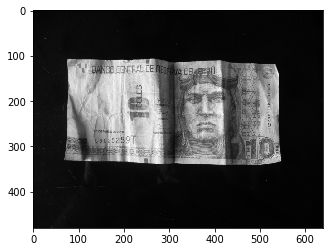

In [15]:
for category in CATEGORIES:  # 
    path = os.path.join(DATADIR,category)  #
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [16]:
print(img_array)

[[ 7  6  6 ...  2  2  1]
 [ 7  6  6 ...  1  2  2]
 [ 6  6  6 ...  2  2  2]
 ...
 [12 11 10 ...  2  2  3]
 [11 10 10 ...  2  2  3]
 [10 10 10 ...  2  3  3]]


In [17]:
print(img_array.shape)

(480, 640)


Achicar el tamaño de la imagen

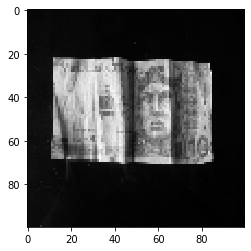

In [18]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [19]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████| 416/416 [00:04<00:00, 100.53it/s]


In [20]:
print(len(training_data))

846


In [21]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

0
3
3
2
3
3
1
0
1
0
[[[[ 70]
   [ 86]
   [ 74]
   ...
   [101]
   [ 97]
   [ 97]]

  [[ 75]
   [ 82]
   [ 80]
   ...
   [100]
   [ 98]
   [ 97]]

  [[ 72]
   [ 75]
   [ 74]
   ...
   [101]
   [ 99]
   [ 97]]

  ...

  [[ 10]
   [ 10]
   [ 11]
   ...
   [ 72]
   [ 68]
   [ 66]]

  [[ 10]
   [ 10]
   [ 10]
   ...
   [102]
   [ 95]
   [ 85]]

  [[  9]
   [  9]
   [ 10]
   ...
   [110]
   [107]
   [104]]]]


In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y = keras.utils.to_categorical(y, 4)
y
X = X/255.0

In [25]:
# Callbacks
# =============================================================================
# callbacks = [
# keras.callbacks.TensorBoard(log_dir=self.log_dir,
# histogram_freq=0, write_graph=True, write_images=False),
# keras.callbacks.ModelCheckpoint(self.checkpoint_path,
# verbose=0, save_weights_only=False),
# ]
# =============================================================================


model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=16, epochs=100, validation_split=0.3, shuffle=True)
historia = model.fit(X, y, batch_size=16, epochs=100, validation_split=0.3, shuffle=True)
model.summary

Train on 592 samples, validate on 254 samples
Epoch 1/100
592/592 [==============================] - 28s 46ms/sample - loss: 0.5773 - acc: 0.7496 - val_loss: 0.5530 - val_acc: 0.7500
Epoch 2/100
592/592 [==============================] - 30s 50ms/sample - loss: 0.5570 - acc: 0.7513 - val_loss: 0.5561 - val_acc: 0.7500
Epoch 3/100
592/592 [==============================] - 30s 50ms/sample - loss: 0.5330 - acc: 0.7538 - val_loss: 0.4891 - val_acc: 0.7717
Epoch 4/100
592/592 [==============================] - 29s 49ms/sample - loss: 0.4238 - acc: 0.8100 - val_loss: 0.3692 - val_acc: 0.8366
Epoch 5/100
592/592 [==============================] - 32s 54ms/sample - loss: 0.3339 - acc: 0.8611 - val_loss: 0.3814 - val_acc: 0.8474
Epoch 6/100
288/592 [=============>................] - ETA: 15s - loss: 0.2500 - acc: 0.9123

KeyboardInterrupt: 

In [ ]:
model.save('BILLETES-CNN6.model')


plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

In [ ]:



# =============================================================================
import cv2
import pickle

#
# =============================================================================

CATEGORIES = ["Billetes_10", "Billetes_20","Billetes_50", "Billetes_100"]
type(CATEGORIES)

def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

os.chdir('C://Users//Intel//Documents//UNIVERSIDAD_DE_LIMA//IDIC//2019//INDENTIFICADOR_BILLETES//MODELO_ENTRENAMIENTO_BILLETES')

model = tf.keras.models.load_model("BILLETES-CNN5.model")
model
import joblib
from joblib import dump, load

pickle_file = './pickle_data.joblib'
start = time.time()
with open(pickle_file, 'wb') as f:
    dump(data, f)
raw_dump_duration = time.time() - start
print("Raw dump duration: %0.3fs" % raw_dump_duration)



# save the model to disk
filename = 'finalized_model1.gz'
filename
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

os.chdir('C://Users//Intel//Documents//UNIVERSIDAD_DE_LIMA//IDIC//2019//INDENTIFICADOR_BILLETES//MODELO_ENTRENAMIENTO_BILLETES//TEST')

prediction1 = model.predict([prepare('P9030031.jpg')]) # billete de 50
prediction2 = model.predict([prepare('P9030048.jpg')]) # billete de 100
prediction3 = model.predict([prepare('P9030047.jpg')]) # billete de 10
prediction4 = model.predict([prepare('P9030062.jpg')]) # billete de 20
prediction5 = model.predict([prepare('P9030189.jpg')]) # billete de 20 anverso
prediction6 = model.predict([prepare('P9030201.jpg')]) # billete de 50 anverso
prediction7 = model.predict([prepare('P9030201.jpg')]) # billete de 50 anverso


for y, row in enumerate(prediction5):
    for x, val in enumerate(row):
        if val == 1:
            print (x)
            ubicacion = x

print(CATEGORIES[ubicacion])